**Importing required libraries and defining binomial likelihood function**

In [ ]:

import random
import numpy as np
import matplotlib.pyplot as plt

# computation of n choose r
def nCr(n, r): 
  return (fact(n) / (fact(r) * fact(n - r))) 
    
# defining factorial computation
def fact(z):  
    f = 1  
    if z == 0:  
        return f;  
    else:  
        for i in range(1,z+1):  
            f = f * i;  
        return f; 

# binomial likelihood
def binom(n,r,p):
  binom = nCr(n,r)*pow(p,r)*pow(1-p,(n-r))
  return binom

**Defining beta prior**


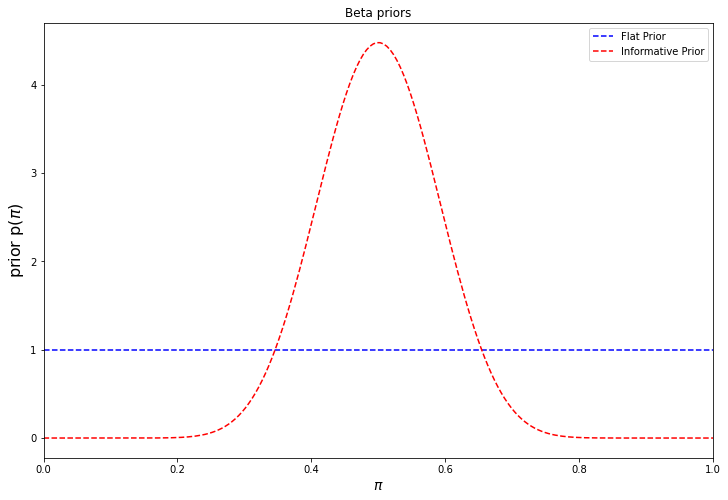

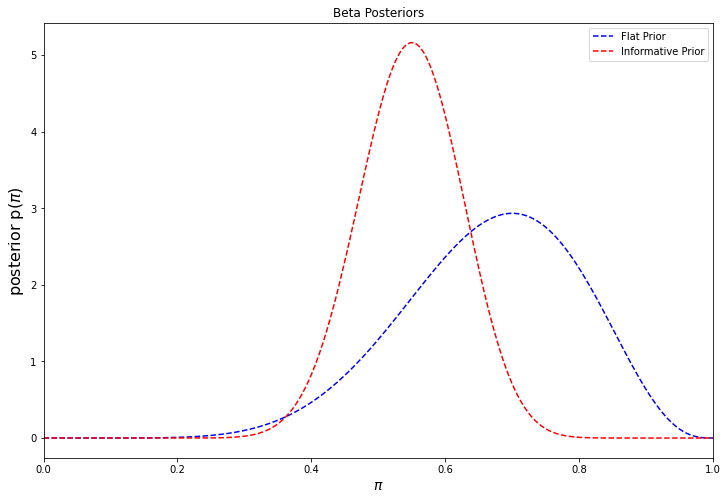

In [ ]:
def gamma(x):
   gamma = fact(x-1)
   return gamma

def beta(a,b,x):
  beta = (gamma(a+b)/(gamma(a)*gamma(b)))*pow(x,a-1)*pow((1-x),(b-1))
  return beta

thetas = np.linspace(0, 1, 200)
#flat prior
a = 1
b = 1
# informative prior
a1 = 16
b1 = 16
prior = beta(a,b,thetas)
prior1 = beta(a1,b1,thetas)

n = 10
h = 7
post = beta(h+a, n-h+b, thetas)
post1 = beta(h+a1, n-h+b1, thetas)

fig = plt. figure(figsize=(12,8))
plt.plot(thetas, prior,linestyle='dashed',label='Flat Prior', c='blue')
plt.plot(thetas, prior1,linestyle='dashed',label='Informative Prior', c='red')
plt.title("Beta priors")
plt.xlim([0, 1])
plt.xlabel('$\pi$', fontsize=14)
plt.ylabel('prior p($\pi$)', fontsize=16)
plt.legend()
plt.show()


fig = plt. figure(figsize=(12,8))
plt.plot(thetas, post,linestyle='dashed',label='Flat Prior', c='blue')
plt.title("Beta Posteriors")
plt.plot(thetas, post1,linestyle='dashed',label='Informative Prior', c='red')
plt.xlim([0, 1])
plt.xlabel('$\pi$', fontsize=14)
plt.ylabel('posterior p($\pi$)', fontsize=16)
plt.legend()
plt.show()


**Initialising the parameters**

In [ ]:
# considering the example of 100 tosses wherein we obtain 70 heads
n = 100  
h = 70

# considering the flat beta prior which is uninformative
a = 1
b = 1

**Metropolis Hastings Algorithm** 

In [ ]:
# number of samples and length of markov chain , x seed to start the algorithm, standard deviation
def MH(num_samples ,x_init ,sd ):

   # generating a random number from the uniform distribution
   np.random.seed(1234)
   u = np.random.uniform(0,1)

   x_curr = x_init

   posterior_thetas_accept = []
   posterior_thetas_reject = []
   for i in range(1,num_samples):
        x_prop = np.random.normal(x_curr,sd)

        #if proposed parameter is outside the range , set it equal to current value, otherwise keep it
        if(x_prop<0 or x_prop>1):
            x_prop = x_curr
        else:
            x_prop = x_prop

        # Bayes numerators (Bayes denominator is not being calculated as it gets cancelleed out in MH algorithm)
        posterior_prop = beta(a,b,x_prop)*binom(n,h,x_prop)
        posterior_curr = beta(a,b,x_curr)*binom(n,h,x_curr)
    
        #Probability of accepting
        accept_theta_prop = min(1.0, posterior_prop/posterior_curr)

        if (accept_theta_prop > u):
            x_select = x_prop
            posterior_thetas_accept.append(x_select)
        else:
            x_select = x_curr
            posterior_thetas_reject.append(x_select)
            
        x_curr = x_select
   
   return np.array(posterior_thetas_accept) , np.array(posterior_thetas_reject)



**Implementation with initial value = 0.9, standard deviation= 0.3**

In [ ]:
posterior_thetas_accept, posterior_thetas_reject = MH(10000, 0.9, 0.3)
samples = 10000;
std = np.std(posterior_thetas_accept)

print("total no. of samples considered = ", samples)
print("accepted number of samples = " , len(posterior_thetas_accept))
print("rejected number of samples = " , len(posterior_thetas_reject))
print("percentage of acceptance = " , (len(posterior_thetas_accept)/samples)*100)
print("standard deviation of posterior thetas = ", std)

total no. of samples considered =  10000
percentage of acceptance =  42.3
standard deviation of posterior thetas =  0.05463328407510764


**Plots**

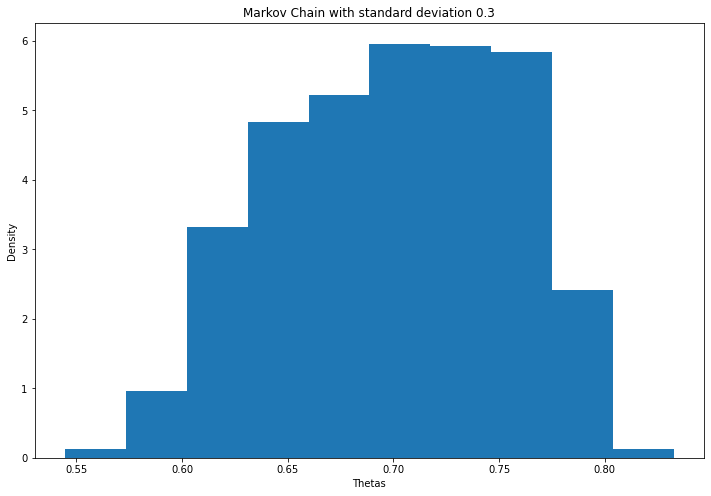

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(posterior_thetas_accept,density = True) 
plt.title("Markov Chain with standard deviation 0.3")
plt.xlabel("Thetas")
plt.ylabel("Density")
plt.show()
